<a href="https://colab.research.google.com/github/joaochenriques/TurbulenceLab/blob/main/TurbulenceLab_PostProcess_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assign your test case name to the variable *TEST_CASE_NAME* as shown

In [33]:
google_link = 'https://drive.google.com/file/d/1IcAEOSKGW5kyhw4t3vg3ZZ9GTDNbHd9L/view?usp=sharing'
H5_FILENAME = 'Turbulence_Lab_G01.h5'

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libs

In [35]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import h5py
import matplotlib.pyplot as mpl
import numpy as np
import gdown

In [ ]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

# Download test case

In [37]:
gdown.download(google_link, H5_FILENAME, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1IcAEOSKGW5kyhw4t3vg3ZZ9GTDNbHd9L
To: /content/Turbulence_Lab_G01.h5
100%|██████████| 230M/230M [00:00<00:00, 244MB/s]


'Turbulence_Lab_G01.h5'

In [15]:
hf = h5py.File( H5_FILENAME, 'r' )

times = np.array( hf['Test_Central/time'] )
velocity = np.array( hf['Test_Central/hotwire'] )

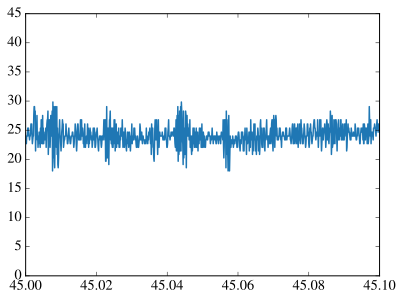

In [21]:
mpl.figure(1)
mpl.plot( times, velocity )
mpl.xlim( 45, 45.1 )
mpl.savefig( 'velocity_zoom.pdf', bbox_inches='tight', pad_inches=0.02 );